<a href="https://colab.research.google.com/github/DenisFoxL/Neural_Networks/blob/master/Copy_of_Ex4_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Neural Networks</b></center></h1>
<h3><center>Exercise 4</center></h3>


*Your* Name:  
<font color='red'>
Denis Lissitsa, 314880477
Lior Bern, 206263071   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, **share** this **notebook** with the 'submit' mail and sent **predictions_{IDS}.txt** file to the 'submit' mail.
- Submit deadline: 31/5/2023

- ***Note***: the predictions file name should be in this format:
"prediction_" then your ids seperated by '_' and ".txt" at the end.

e.g. two students with the ids: "12345", "54321" will submit the file: "predictions_12345_54321.txt".

***Pay attention!!*** A submission with a wrong file name will be graded as 0 !

In [1]:
# example: IDS_STRING = "12345_54321"
IDS_STRING = 314880477_206263071

## Neural Network in PyTorch

____________

In this part we learn to:
1. Load and preprocess datasets using pytorch.
2. Implement and train a feed-forward neural network (multi-layer perceptron) for handwriting recognition (MNIST dataset), using Pytorch.
3. Implement and train a convolutional neural network (CNN) on MNIST.

### **1. Setup**
Before running code on Colab:
- Go to "Runtime" -> "Change runtime type", and make sure to choose "GPU" for Hardware accelerator.
- Check your Python version at the command line by running "!python --version". It should be Python 3.6 by default.
- Upload all files of this assignment (code and datasets) to your Drive (e.g "nn/assignments/assignment5") and mount that data to the machine. See the next cell below.  
In principle, it is also possible to upload files to the local disk of the colab machines. However, such files will be deleted when the machine is restarted (not a frequent event).

In [2]:
# check python version
!python --version

Python 3.10.12


In [3]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the code and datasets.
# Recommended path: 'nn/assignments/assignment5/'
FOLDERNAME = 'nn/assignments/'
ASSIGNMENTNAME = 'assignment5'

%cd drive/My\ Drive
%cp -r $FOLDERNAME/$ASSIGNMENTNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


### **2. Dataset**

In this exercise, we are going to build a neural network that identify handwritten digits. We will use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels and there are 10 different digits. The network will take these images and predict the digit in them.





Let's visualize the data before working with it.  
1. We can use the "torchvision" package to download the trainset. Set ```transform``` as to be the transform function below (It normalizes each image) and ```train=True```.
2. We use torch.utils.data.DataLoader to load the data. Set ```batch_size=64```.

In [4]:
# load packages
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [5]:
data_path = "./MNIST_data"

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the data
mnist_data = datasets.MNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 104110279.24it/s]


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21170166.69it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24860584.41it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4258052.92it/s]


Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



Using the ```mnist_data``` (dataset) and ```mnist dataloader``` (batch dataloader):
1. Print the number of samples in the whole dataset.
2. Print the number of samples in a single batch.
3. Print the shape of images in the data.
4. Print the number of labels in the dataset (targets).
5. Plot 3 random images using matplotlib (```plt.imshow```) and print their labels.

In [6]:
# get single batch
dataiter = iter(mnist_dataloader)
batch_images, batch_labels = next(dataiter)

# 1. Print the number of samples in the whole dataset.
print(len(mnist_data))

# 2. Print the number of samples in a single batch.
print(len(batch_images))

# 3. Print the shape of images in the data (image dimensions).
print(batch_images[0].size())

# 4. Print the number of labels in the whole dataset (using the targets in the dataloader).
print(len(mnist_dataloader.dataset.targets))

60000
64
torch.Size([1, 28, 28])
60000


Labels: tensor([5, 6, 8])


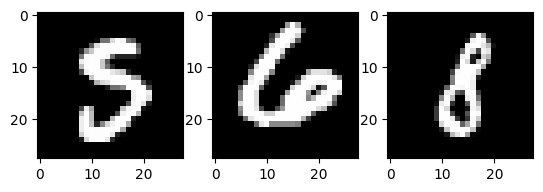

In [7]:
# 5. plot three images and print their labels
idx = np.random.choice(range(64),3) # three rundom indices
plt.subplot(1,3,1)
plt.imshow(batch_images[idx[0]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(batch_images[idx[1]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(batch_images[idx[2]].numpy().squeeze(), cmap='Greys_r')
print("Labels:",batch_labels[idx])

### **3. Feed-Forward Neural Network - Architecture**

In the next section, we are going to implement a neural network with pytorch that gets mnist images and recognize the digit in them.  

Network Architecture (see image below): **784 input units**, a hidden layer with **128 units** and a **ReLU activation**, then a hidden layer with **64 units** and a **ReLU activation**, and finally an **output layer** with a **log-softmax activation**.

Note: Since simple neural networks get vectors as inputs, and not images (unlike CNNs), we should flatten the data. Each sample with shape (28,28) becomes (784,). That is why the input layer has 784 units.  


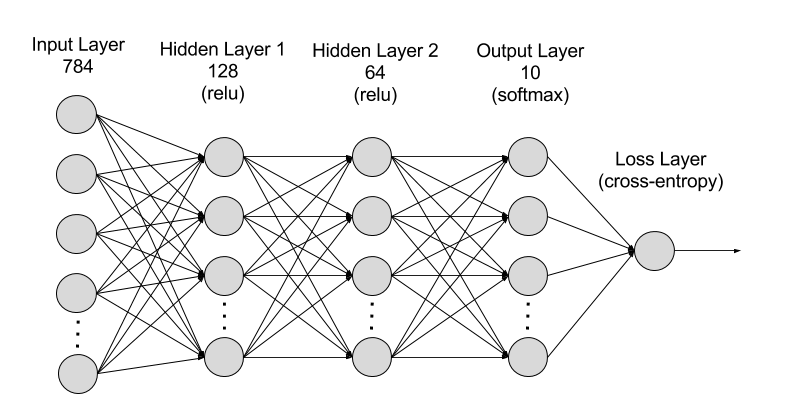

Complete the code below: The constructor (```__init___```) should contain defenitions of layers like ```Linear``` or ```Relu```. The ```forward``` function should contain the logic between the layers declared in the constructor.  

For this section, as well as the next section, you can follow online tutorials (like **[this tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)** or **[this one](https://www.marktechpost.com/2019/11/09/create-a-neural-network-with-pytorch/)**) to understand how to implement neural networks with pytorch.

In [8]:
from torch import nn, optim
import torch.nn.functional as F

In [9]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        '''
        Declare layers for the model
        '''
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.LogSoftmax(dim=1)
        )


    def forward(self, x):
        ''' Forward pass through the network, returns log_softmax values '''
        x=self.flatten(x)
        predictions=self.linear_relu_stack(x)
        return predictions

model = NeuralNetwork()
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): LogSoftmax(dim=1)
  )
)

Now that we have a network, let's see what happens when we pass in an image.  
Let's choose a random image and pass it through the network. It should return a prediction - confidences for each class. The class with the highest confidence is the prediction of the model for that image.   
We visualize the results using ```view_classify``` function below.

In [10]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    image - the input image to the network
    ps - the class confidences (network output)
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [11]:
def random_prediction_example(data_loader, model):
  '''
  The function sample an image from the data, pass it through the model (inference)
  and show the prediction visually. It returns the predictions confidences.
  '''
  # take a batch and randomly pick an image
  dataiter = iter(data_loader)
  images, labels = next(dataiter)
  images.resize_(64, 1, 784)
  img = images[0]

  # Forward pass through the network
  # we use torch.no_grad() for faster inference and to avoid gradients from
  # moving through the network.
  with torch.no_grad():
      ps = model(img)
      # the network outputs log-probabilities, so take exponential for probabilities
      ps = torch.exp(ps)

  # visualize image and prediction
  view_classify(img.view(1, 28, 28), ps)
  return ps

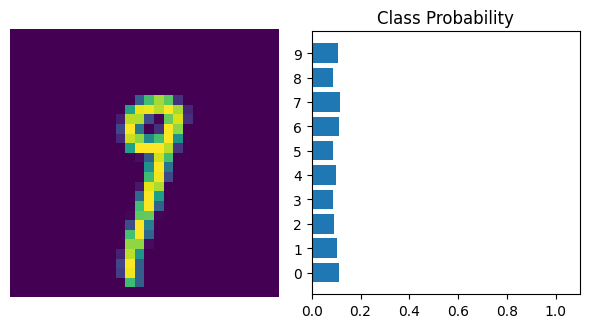

In [12]:
# you can run this cell multiple times for different images
preds_conf = random_prediction_example(mnist_dataloader, model)

Print the prediction of the network for that sample:

In [13]:
print(torch.argmax(preds_conf))

tensor(7)


### **4. Feed-Forward Neural Network - Training**

We can now train and evaluate our network.
1. Split the dataset into a training set and a validation set. Train-set size: 80% of the total data. Val-set size: the rest (20%).
2. Create a dataloader for each set (```train_loader``` and ```val_loader```, see Section 2 for examples).
3. Choose hyperparameters (for now we choose ```learning_rate=0.003``` and ```num_epochs=5```).
4. Use SGD (Stochastic Gradient Descent) as the optimizer.
5. Since it is a multi-class classification task, use "negative log-likelihood loss" as the loss criterion.
6. Train your model on the train-set and evaluate it on the validation-set.
7. During training, for each epoch, track the training loss and validation loss.

In [14]:
from torch.utils import data

In [15]:
# 1. split trainset into train and validation (use torch.utils.data.random_split())
SPLIT_SIZE=0.8
n_train_examples = int(len(mnist_data) * SPLIT_SIZE)
n_valid_examples = len(mnist_data) - n_train_examples
train_data, valid_data = data.random_split(mnist_data, [n_train_examples, n_valid_examples])

batch_size=64

# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)

train_loader = data.DataLoader(train_data,shuffle=True,batch_size=batch_size)

# 2.2. create data loader for the valset (batch_size=64, shuffle=False)

val_loader = data.DataLoader(train_data,shuffle=False,batch_size=batch_size)

In [16]:
# 3. set hyper parameters
learning_rate = 0.003
nepochs = 5

In [17]:
model = NeuralNetwork()

# 4. create sgd optimizer. It should optimize our model parameters with
#    learning_rate defined above
optimizer = optim.SGD(model.parameters(),learning_rate)

# 5. create a criterion object. It should be negative log-likelihood loss since the task
#    is a multi-task classification (digits classification)
criterion = nn.NLLLoss()

In [18]:
# 6.1. Train the model. (Fill empty code blocks)
def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input = False):
  '''
  Train a pytorch model and evaluate it every epoch.
  Params:
  model - a pytorch model to train
  optimizer - an optimizer
  criterion - the criterion (loss function)
  nepochs - number of training epochs
  train_loader - dataloader for the trainset
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                Should be True for Neural Networks
                                but False for Convolutional Neural Networks.
  '''
  train_losses, val_losses = [], []
  for e in range(nepochs):
      running_loss = 0
      running_val_loss = 0
      for images, labels in train_loader:
          if is_image_input:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

          # Training pass
          model.train() # set model in train mode
          optimizer.zero_grad()
          pred=model(images)
          loss=criterion(pred,labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
      else:
          val_loss = 0
          # 6.2 Evalaute model on validation at the end of each epoch.
          with torch.no_grad():
              for images, labels in val_loader:
                  if is_image_input:
                    # Flatten MNIST images into a 784 long vector
                    images = images.view(images.shape[0], -1)
                  val_pred=model(images)
                  val_loss = criterion(val_pred,labels)
                  running_val_loss += val_loss.item()

          # 7. track train loss and validation loss
          train_losses.append(running_loss/len(train_loader))
          val_losses.append(running_val_loss/len(val_loader))

          print("Epoch: {}/{}.. ".format(e+1, nepochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))
  return train_losses, val_losses

In [19]:
  # 6.1. Train the model.
  ## NOTE: Do not run this cell continuously without running the two cells above!
  ##       Otherwise, you might train a model you have already trained.
  ##       So make sure to run the two cells above (to first initialize the model
  ##       and optimizer), every time, before running this cell!
train_losses, val_losses = train_model(model, optimizer, criterion, nepochs,
                                       train_loader, val_loader, is_image_input=True)

Epoch: 1/5..  Training Loss: 2.034..  Validation Loss: 1.570.. 
Epoch: 2/5..  Training Loss: 1.075..  Validation Loss: 0.749.. 
Epoch: 3/5..  Training Loss: 0.616..  Validation Loss: 0.524.. 
Epoch: 4/5..  Training Loss: 0.477..  Validation Loss: 0.441.. 
Epoch: 5/5..  Training Loss: 0.416..  Validation Loss: 0.395.. 


If you implemented everything correctly, you should see the training loss drop with each epoch.

8. Plot train loss and validation loss as a function of epoch. **On the same graph!**

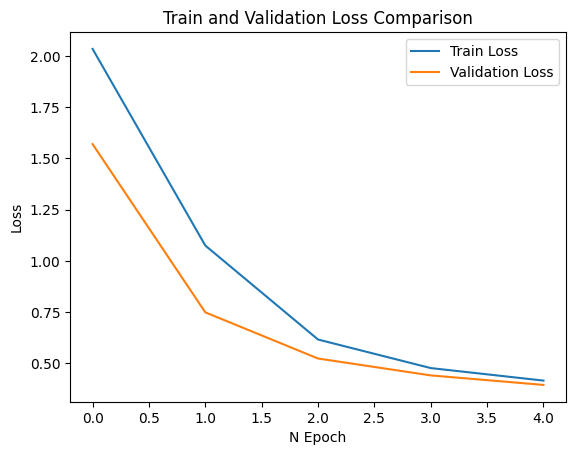

In [20]:
# plot train and validation loss as a function of #epochs
plt.plot(range(nepochs),train_losses,label='Train Loss')
plt.plot(range(nepochs),val_losses,label='Validation Loss')
plt.xlabel('N Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss Comparison')
plt.legend()
plt.show()

With the network trained, we can check out it's predictions:

tensor([[5.6491e-05, 9.8177e-01, 2.3670e-03, 6.1049e-03, 2.0687e-05, 3.9682e-03,
         8.3200e-04, 6.0432e-04, 4.0131e-03, 2.6300e-04]])

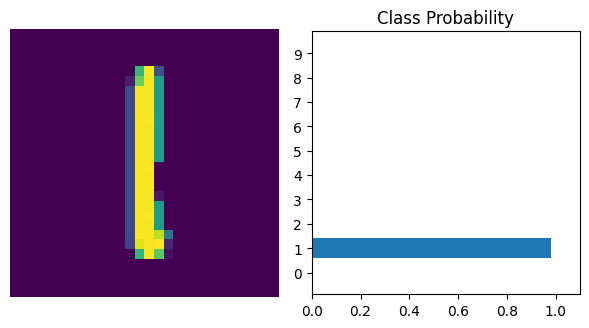

In [21]:
# you can run this cell multiple times for different images
random_prediction_example(mnist_dataloader, model)

Calculate the model's accuracy on the validation-set.

In [22]:
def evaluate_model(model, val_loader, is_image_input=False):
  '''
  Evaluate a model on the given dataloader.
  Params:
  model - a pytorch model to train
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                   Should be True for Neural Networks
                                   but False for Convolutional Neural Networks.
  '''
  validation_accuracy = 0
  with torch.no_grad():
      for images, labels in val_loader:
          if is_image_input:
            # flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
          # forward pass
          log_ps = model(images)
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape)

          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

In [23]:
print(f"Validation accuracy: {evaluate_model(model, val_loader, is_image_input=True)}")

Validation accuracy: 0.8888750076293945


### **5. Convolutional Neural Networks**

In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  

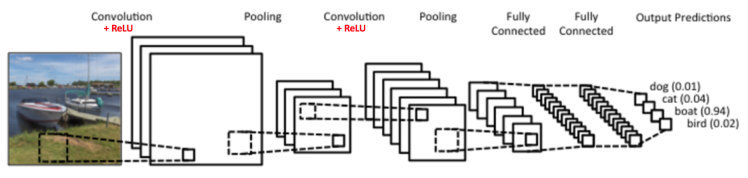

You may use this **[this article](https://cs231n.github.io/convolutional-networks/)** as a broader reference about convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**Q1:** Given an image with shape [1,28,28], what will be the shape of the output of a convolution layer with 10 5x5 kernels (filters) without padding (stride=1)?

**A1:**
<font color='red'>
[10,24,24]
</font>

**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,28,28]. What should be the padding?

**A2:**
<font color='red'>
2
</font>

**Q3:** Given an image with width $W_{in}$, height $H_{in}$, and a convolution layer with padding $P$, stride $S$ and filter size $F$. Write a formula for the width $W_{out}$ and a formula for the height $H_{out}$ of the convolution's output.   
(In other words, what will be the width and the height of the output?).

**A3:**
<br>
<font color='red'>
**W**out=1+(**W**in+2**P**-**F**)/**S**
<br>
**H**out=1+(**H**in+2**P**-**F**)/**S**
</font>

Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [24]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu
        x = self.conv2(x) # conv 2
        x = F.max_pool2d(x, 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 320) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
print(cnn_model)

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


We can now train the model on the train set.

In [25]:
# set hyperparameters
cnn_nepochs = 3
cnn_learning_rate = 0.01

In [26]:
# train the conv model
cnn_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/3..  Training Loss: 1.169..  Validation Loss: 0.332.. 
Epoch: 2/3..  Training Loss: 0.237..  Validation Loss: 0.183.. 
Epoch: 3/3..  Training Loss: 0.155..  Validation Loss: 0.130.. 


In [27]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.961270809173584


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within 3 epochs only!) :)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set.

You should consider changing:
1. Prepocess:
  - Change normalization
  - Better representation of the data

1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

1. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs



In [28]:
## Prepocess

#Hyper Hyper parameters
DEVICE=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_epochs=10
batch_size=64
SPLIT_SIZE=0.8
optuna_trials=100

#Download and apply transform to the dataset
mnist_data = datasets.MNIST(data_path, download=True, train=True,transform=transform)

#Number of observations
n_train_examples = int(len(mnist_data) * SPLIT_SIZE)
n_valid_examples = len(mnist_data) - n_train_examples

#Split into training and validation subsets
train_data, valid_data = data.random_split(mnist_data, [n_train_examples, n_valid_examples])

#Create data loaders
train_loader = data.DataLoader(train_data,shuffle=True,batch_size=batch_size)
val_loader = data.DataLoader(valid_data,shuffle=True,batch_size=batch_size)


In [29]:
!pip install optuna
import optuna
from optuna.trial import TrialState

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.7 MB/s eta 0:00:00


In [30]:
## Find network and hyperparams that achieve best validation accuracy as possible
"""
 To find the optimal hyperparameters for the model, we have decided to utilize
 the Optuna library as an algorithm to automatically explore the hyperparameter
 space.
 We are going to be optimizing the following hyperparameters:
 -Number of convolution layers
 -Number of kernels in first convolution layer
 -Precent of dropout in first convolution layer
 -Number of FC layers
 -Neurons in the FC layers
 -Precent of droput in FC layers
 -Learning rate

 The best hyperparameters calculated by the framework will be used in building
 a more accurate CNN.
"""

class CNNet(nn.Module):
    """
    Convolutional Neural Network (CNNet) model.

    Parameters:
        trial (optuna.Trial): Optuna trial object for hyperparameter optimization.
        n_conv_layers (int): Number of convolutional layers.
        n_kernels (list): Integer representing the number of kernels for the first convolutional layer.
        n_FC_layers (int): Number of fully connected (FC) layers.
        neurons (list): List of integers representing the number of neurons for each FC layer.
        conv_dropout (float): Dropout rate for the convolutional layers.
        FC_dropout (float): Dropout rate for the FC layers.
        device(bool): Switch for last section (the built in function doesnt work with GPU)
    """

    def __init__(self, n_conv_layers, n_kernels, n_FC_layers, neurons, conv_dropout, FC_dropout,device=True):
        super(CNNet, self).__init__()

        self.flatten = nn.Flatten()  # Flatten layer to convert multidimensional data into 1D

        kernel_size = 5  # Size of the convolutional kernel
        i_s, k_n = 28, 1  # Initial size and number of kernels

        Clayers = []  # List to store convolutional layers
        for i in range(n_conv_layers):
          Clayers.append(nn.Conv2d(k_n, n_kernels, kernel_size=kernel_size))  # Convolutional layer
          i_s = i_s - kernel_size + 1  # Update the size after applying convolution
          k_n = n_kernels  # Update the number of kernels
          n_kernels*=2
          Clayers.append(nn.MaxPool2d(2))  # Max pooling layer to downsample
          i_s /= 2  # Update the size after applying max pooling
          Clayers.append(nn.ReLU())  # ReLU activation function for non-linearity
          if i == 0:
            Clayers.append(nn.Dropout(conv_dropout))  # Dropout layer for regularization

        self.conv_layers = nn.Sequential(*Clayers)  # Sequential container for convolutional layers

        self.out_s = int(i_s * i_s * k_n)  # Size of the flattened output after convolutional layers

        FClayers = []  # List to store fully connected layers
        for i in range(n_FC_layers):
          if i == 0:
            FClayers.append(nn.Linear(self.out_s, neurons[i]))  # First FC layer connected to flattened input
          else:
            FClayers.append(nn.Linear(neurons[i-1], neurons[i]))  # Intermediate FC layers
          FClayers.append(nn.Dropout(FC_dropout[i]))  # Dropout layer for regularization
          FClayers.append(nn.ReLU())  # ReLU activation function for non-linearity

        FClayers.append(nn.Linear(neurons[-1], 10))  # Output FC layer with 10 classes for classification
        FClayers.append(nn.LogSoftmax(dim=1))  # LogSoftmax activation for output probabilities

        self.FC_layers = nn.Sequential(*FClayers)  # Sequential container for FC layers
        if device:
          if torch.cuda.is_available():
            self.cuda()  # Move the model to GPU if available


    def forward(self, x):
      """
      Forward pass of the CNNet model.

      Parameters:
          x (torch.Tensor): Input tensor.

      Returns:
          torch.Tensor: Predicted output tensor.
      """
      x = self.conv_layers(x)  # Pass the input through the convolutional layers
      x = self.flatten(x)  # Flatten the output from convolutional layers
      predictions = self.FC_layers(x)  # Pass the flattened output through the FC layers
      return predictions  # Return the predicted output

def train(model, optimizer,device=True):
    """
    Train the model using the provided optimizer.

    Parameters:
        model (torch.nn.Module): The model to be trained.
        optimizer (torch.optim.Optimizer): The optimizer for updating the model's parameters.
    """
    criterion=nn.NLLLoss()
    model.train()  # Set the model to training mode
    for i, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # Reset gradients to zero
        if device:
          output = model(data.to(DEVICE))  # Forward pass
          loss = criterion(output, target.to(DEVICE))  # Compute the loss
        else:
          output=model(data)
          loss=criterion(output,target)
        loss.backward()  # Backward pass to compute gradients
        optimizer.step()  # Update the model's parameters


def test(model, val_loader):
  '''
  Evaluate the model on the validation dataset.

  Parameters:
      model (torch.nn.Module): The model to be evaluated.

  Returns:
      float: Accuracy of the model on the validation dataset.

  '''
  model.eval()
  validation_accuracy = 0
  with torch.no_grad():
      for images, labels in val_loader:
          # forward pass
          log_ps = model(images.to(DEVICE))
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape).to(DEVICE)
          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

def objective(trial):
    """
    Objective function for the Optuna optimization.

    Parameters:
        trial (optuna.Trial): A Trial object that contains the current state of the optimization.

    Returns:
        float: Accuracy achieved by the model with the given hyperparameters.
    """
    n_conv_layers = trial.suggest_int("n_conv_layers", 1, 2)  # Number of convolutional layers
    n_kernels = trial.suggest_categorical(f'kernel_ammount', [5, 10])  # Number of kernels in first conv layer
    n_FC_layers = trial.suggest_int("n_FC_layers", 2, 3)  # Number of fully connected layers

    neurons = []  # Number of neurons in each fully connected layer
    FC_dropout=[] # Fully connected layer dropout rate
    for i in range(n_FC_layers):
        if i == 0:
            neurons.append(trial.suggest_int(f"num_FC_neurons{i}", 128, 256, 4))
        else:
            neurons.append(trial.suggest_int(f"num_FC_neurons{i}", 12, neurons[i-1], 4))
        FC_dropout.append(trial.suggest_float(f"drop_FC{i}", 0.2, 0.5))

    conv_dropout = trial.suggest_float("drop_conv", 0.2, 0.5)  # Convolutional layer dropout rate


    model = CNNet( n_conv_layers, n_kernels, n_FC_layers, neurons, conv_dropout, FC_dropout)  # Create model

    lr = trial.suggest_float("lr", 1e-5, 1e-4, log=True)  # Learning rates
    optimizer = optim.Adam(model.parameters(), lr=cnn_learning_rate)

    for epoch in range(n_epochs):
        train(model, optimizer)  # Train the model
        accuracy =test(model,val_loader)  # Evaluate the model

        trial.report(accuracy, epoch)  # Report the accuracy to Optuna

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()  # Prune the trial if necessary

    return accuracy  # Return the final accuracy achieved by the model



In [31]:
#Run auto tuner
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=optuna_trials)

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)  # Print the value (accuracy) of the best trial

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))  # Print the hyperparameter settings of the best trial

# Print the importance of each hyperparameter in percentage
most_important_parameters = optuna.importance.get_param_importances(study, target=None)
for key, value in most_important_parameters.items():
    print('  {}:{}{:.2f}%'.format(key, (15-len(key))*' ', value*100))


[I 2023-06-30 07:46:17,202] A new study created in memory with name: no-name-be43c0c1-c002-45c6-8684-73f32a2bd6d6
[I 2023-06-30 07:50:04,026] Trial 0 finished with value: 0.9668333530426025 and parameters: {'n_conv_layers': 2, 'kernel_ammount': 10, 'n_FC_layers': 2, 'num_FC_neurons0': 172, 'drop_FC0': 0.3236171871780616, 'num_FC_neurons1': 168, 'drop_FC1': 0.3889301229414771, 'drop_conv': 0.27357502307576315, 'lr': 7.356433661860243e-05}. Best is trial 0 with value: 0.9668333530426025.
[I 2023-06-30 07:53:25,016] Trial 1 finished with value: 0.9722499847412109 and parameters: {'n_conv_layers': 1, 'kernel_ammount': 5, 'n_FC_layers': 2, 'num_FC_neurons0': 228, 'drop_FC0': 0.48293767672334836, 'num_FC_neurons1': 48, 'drop_FC1': 0.3738336527008118, 'drop_conv': 0.3059584441967446, 'lr': 1.416780487358808e-05}. Best is trial 1 with value: 0.9722499847412109.
[I 2023-06-30 07:56:51,208] Trial 2 finished with value: 0.9524999856948853 and parameters: {'n_conv_layers': 2, 'kernel_ammount': 10,

Best trial:
  Value:  0.981333315372467
  Params: 
    n_conv_layers: 1
    kernel_ammount: 10
    n_FC_layers: 2
    num_FC_neurons0: 164
    drop_FC0: 0.22244159983647835
    num_FC_neurons1: 68
    drop_FC1: 0.21965934902943232
    drop_conv: 0.20030128152481982
    lr: 1.414552461415544e-05
  lr:             39.16%
  drop_FC1:       14.54%
  n_conv_layers:  13.45%
  drop_conv:      11.08%
  drop_FC0:       10.55%
  n_FC_layers:    5.25%
  num_FC_neurons0:4.15%
  kernel_ammount: 1.82%


In [32]:
#Using calculated optimal hyperparameters
n_conv_layers = trial.params["n_conv_layers"]
n_kernels = trial.params["kernel_ammount"]
n_FC_layers = trial.params["n_FC_layers"]
neurons = [trial.params[f"num_FC_neurons{i}"] for i in range(n_FC_layers)]
conv_dropout = trial.params["drop_conv"]
FC_dropout =[trial.params[f"drop_FC{i}"] for i in range(n_FC_layers)]
lr=trial.params["lr"]

# save the best model in this variable
best_model=CNNet(n_conv_layers, n_kernels, n_FC_layers, neurons, conv_dropout, FC_dropout,False)
optimizer=optim.Adam(best_model.parameters(), lr=lr)

#Training the model
for e in range(n_epochs):
  train(best_model,optimizer,False)


When you are satisfied with your model performance on the validation set, load the [test set](https://drive.google.com/file/d/1GFtLV1aNo49IDdObyyvZoTS4w_qEZvjM/view?usp=share_link) (the samples are already normalized), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Send the file to the 'submit' mail with this notebook.**

Make sure that each prediction will be printed in a new line.

For Example ("predictions.txt"):
```
0  
5  
9
```

In [33]:
def predict_and_save(model, test_path, file_name):
  # load mnist test data
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))
  # create a dataloader
  mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=32, shuffle=False)
  # make a prediction for each batch and save all predictions in total_preds
  total_preds = torch.empty(0, dtype=torch.long)
  for imgs in mnist_test_loader:
    log_ps = model(imgs[0])
    ps = torch.exp(log_ps)
    _, top_class = ps.topk(1, dim=1)
    total_preds = torch.cat((total_preds, top_class.reshape(-1)))
  total_preds = total_preds.cpu().numpy()
  # write all predictions to a file
  with open(file_name,"w") as pred_f:
    for pred in total_preds:
      pred_f.write(str(pred) + "\n")


In [34]:
# run this to save test predictions to "predictions.txt"
predict_and_save(best_model, test_path=f"{ASSIGNMENTNAME}/mnist_test.pth", file_name=f"predictions_{IDS_STRING}.txt")